In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, delimiter=r",\s+", engine='python')
income_data.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
income_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
col=str("""age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.""")

col = col.split(sep='\n')
col=[i.split(sep = ':')[0] for i in col]
len(col)

14

In [6]:
col.append('income_class')

In [7]:

col1=[]
for i in col:
    col1.append(i.replace('-','_'))
len(col)
col = col1.copy()
col


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_class']

In [8]:
income_data.columns = col
income_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Getting familiar with the data

In [9]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income_class    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
income_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
income_data.income_class.unique()

array(['<=50K', '>50K'], dtype=object)

In [12]:
income_data.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [13]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [14]:
income_data.income_class[income_data.income_class == '>50K'].count()

7841

In [15]:
def get_num_people_with_high_income(dataframe):
    return dataframe.income_class[dataframe.income_class == '>50K'].count()

In [16]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

In [17]:
get_num_people_with_high_income(income_data)

7841

In [18]:
income_data.shape

(32561, 15)

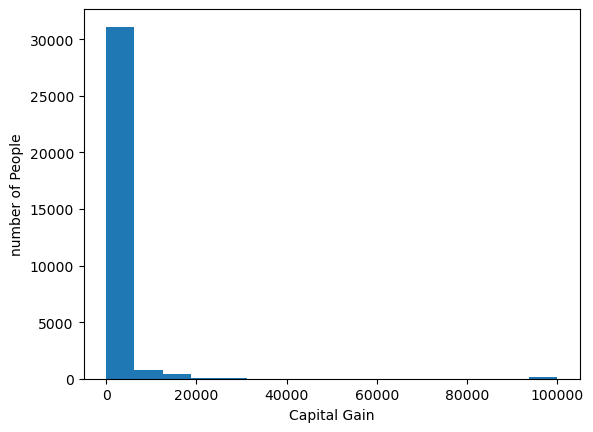

In [19]:
plt.hist(income_data.capital_gain, bins= 'auto')
plt.xlabel('Capital Gain')
plt.ylabel('number of People')
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [20]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    return dataframe.capital_gain[dataframe.capital_gain >= threshold_gain].count()

In [21]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

In [22]:
get_num_people_with_higher_gain(income_data, 60000)

159

Create a pie chart of the number of people by marital status.

In [23]:
income_data.groupby(['marital_status']).agg(['count'])

,age,workclass,fnlwgt,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
,count,count,count,count,count,count,count,count,count,count,count,count,count,count
marital_status,,,,,,,,,,,,,,
Divorced,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443
Married-AF-spouse,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Married-civ-spouse,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976
Married-spouse-absent,418,418,418,418,418,418,418,418,418,418,418,418,418,418
Never-married,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
Separated,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
Widowed,993,993,993,993,993,993,993,993,993,993,993,993,993,993


In [24]:
values = income_data.marital_status.value_counts()
values

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [25]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

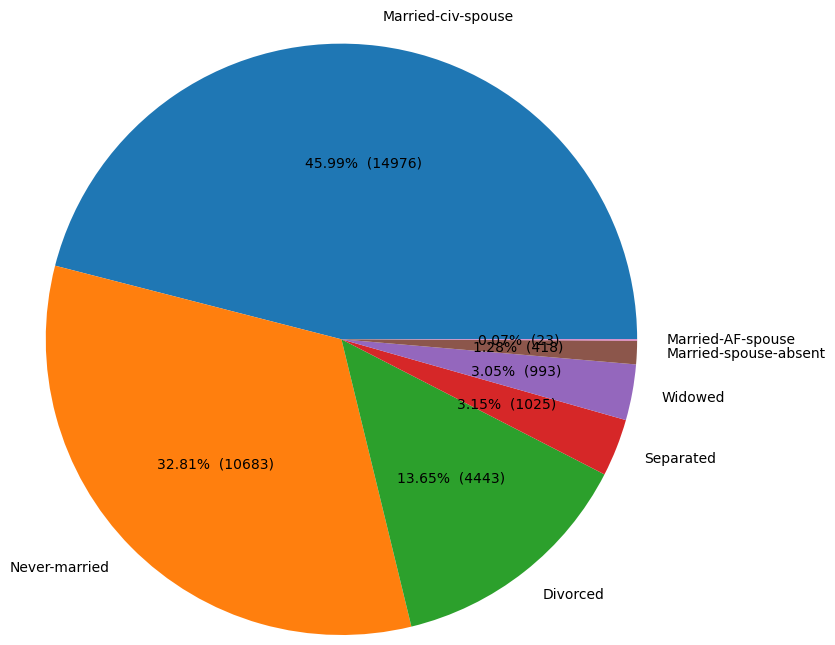

In [26]:
plt.pie(income_data.marital_status.value_counts(), labels = income_data.marital_status.value_counts().index, 
        radius= 2, autopct = make_autopct(values) )
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [27]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    status = income_data.marital_status.value_counts().index[0]
    num_people = income_data.marital_status.value_counts()[0]
    return (status, num_people)

In [28]:
most_prominent_marital_status(income_data)

('Married-civ-spouse', 14976)

In [29]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

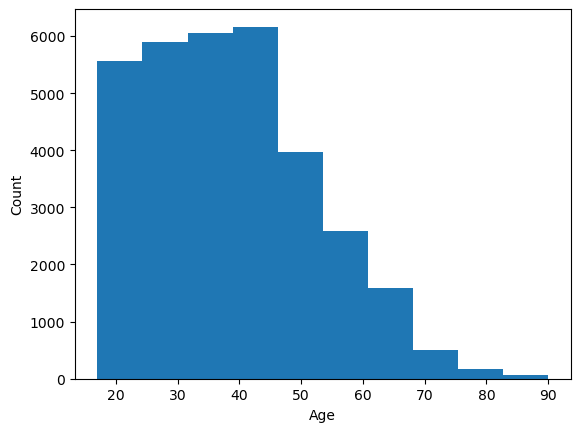

In [30]:
plt.hist(income_data.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [31]:
income_data[income_data.age <= 30].shape[0] + income_data[(income_data.age > 30) & (income_data.age <= 60)].shape[0] + income_data[income_data.age > 60].shape[0]

32561

In [32]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (income_data[dataframe.age <= 30].shape[0],
                               income_data[(dataframe.age > 30) & (dataframe.age <= 60)].shape[0],
                               income_data[dataframe.age > 60].shape[0])

    return young, middle_aged, old

In [33]:
print('Young| Middle age| Old\n',get_num_people_by_age_category(income_data))

Young| Middle age| Old
 (10572, 19657, 2332)


In [34]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

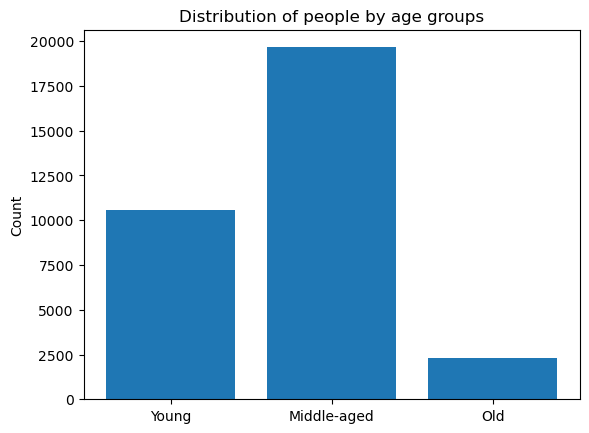

In [35]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [36]:
income_data.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [37]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    num_people = dataframe.native_country.value_counts()[1]
    country = dataframe.native_country.value_counts().index[1]
    return num_people, country

In [38]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

In [39]:
get_second_highest_num_people(income_data)

(643, 'Mexico')

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [40]:
income_data.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [46]:
mean_hours_per_week = income_data.groupby(['occupation']).hours_per_week.mean()
print(type(mean_hours_per_week))
mean_hours_per_week.sort_values(ascending = False)

<class 'pandas.core.series.Series'>


occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_per_week, dtype: float64

In [47]:
mean_hours_per_week.rename({'?':'Unknown'})

occupation
Unknown              31.906131
Adm-clerical         37.558355
Armed-Forces         40.666667
Craft-repair         42.304221
Exec-managerial      44.987703
Farming-fishing      46.989940
Handlers-cleaners    37.947445
Machine-op-inspct    40.755744
Other-service        34.701669
Priv-house-serv      32.885906
Prof-specialty       42.386715
Protective-serv      42.870570
Sales                40.781096
Tech-support         39.432112
Transport-moving     44.656230
Name: hours_per_week, dtype: float64

In [51]:
def get_mean_working_hours_by_occupation(dataframe):
    mean_hours_per_week = dataframe.groupby(['occupation']).hours_per_week.mean()
    mean_hours_per_week = mean_hours_per_week.sort_values(ascending = False)
    mean_hours_per_week = mean_hours_per_week.rename({'?':'Unknown'})
    return round(mean_hours_per_week,2)

In [52]:
hours = get_mean_working_hours_by_occupation(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.99
Exec-managerial      44.99
Transport-moving     44.66
Protective-serv      42.87
Prof-specialty       42.39
Craft-repair         42.30
Sales                40.78
Machine-op-inspct    40.76
Armed-Forces         40.67
Tech-support         39.43
Handlers-cleaners    37.95
Adm-clerical         37.56
Other-service        34.70
Priv-house-serv      32.89
Unknown              31.91
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

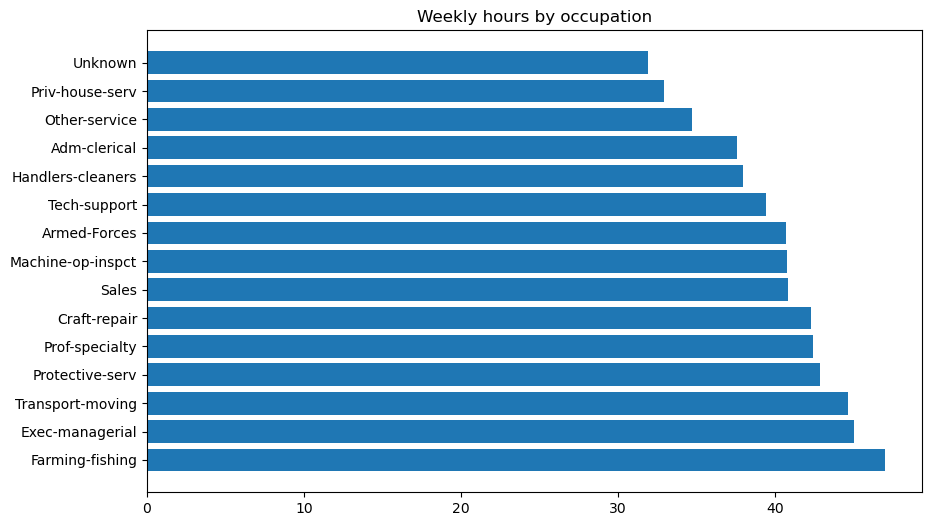

In [53]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()